In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

EXERCISE 1. 

The hourly wages in a particular industry are normally distributed with mean 13.20 (dollars) and standard deviation 2.50 (dollars). A company in this industry employs 40 workers, paying them an average of 12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [2]:
n = 40
sigma = 2.50
mu = 13.20
xbar = 12.20

In [3]:
z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test

-2.5298221281347035

In [4]:
pvalue = stats.norm.cdf(z_test) # left side area
pvalue

0.005706018193000826

In [5]:
alpha = 0.01   # (α = 1% --> 1-99%) it is given in the question

if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 2.

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [6]:
α = 0.01

In [7]:
df_soil = pd.read_csv("soil - Sheet1.csv")
df_soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [8]:
df_soil.shape

(35, 2)

In [9]:
df_soil["Soil1"].mean()

1.6918

In [10]:
df_soil["Soil2"].mean()

1.4171142857142858

Calculate the T_test for the means of two independent samples of scores.

H0 : mu1 = mu2

H1 : mu1 != mu2

In [11]:
stats.ttest_ind(df_soil["Soil1"], df_soil["Soil2"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [12]:
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [13]:
df_soil.isnull()

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [14]:
indTest = stats.ttest_ind(df_soil["Soil1"], df_soil["Soil2"], nan_policy='omit')

indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [15]:
t = indTest.statistic
t

5.1681473319343345

In [16]:
p_value = indTest.pvalue
p_value

2.5932287323528147e-06

In [17]:
# Comparing p value

alpha = 0.01      # alpha/2 = 0.005

if indTest.pvalue < alpha/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 3. 

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats. 2015 PISA Test Dataset

(i) Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

(ii) Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [18]:
df_pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")
df_pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [19]:
df_pisa.describe()  # for all continents

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [20]:
df_pisa.shape

(70, 6)

In [21]:
# see the unique values 

df_pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [22]:
df_pisa['Continent_Code'].fillna(value='NA', inplace = True)

In [23]:
df_pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

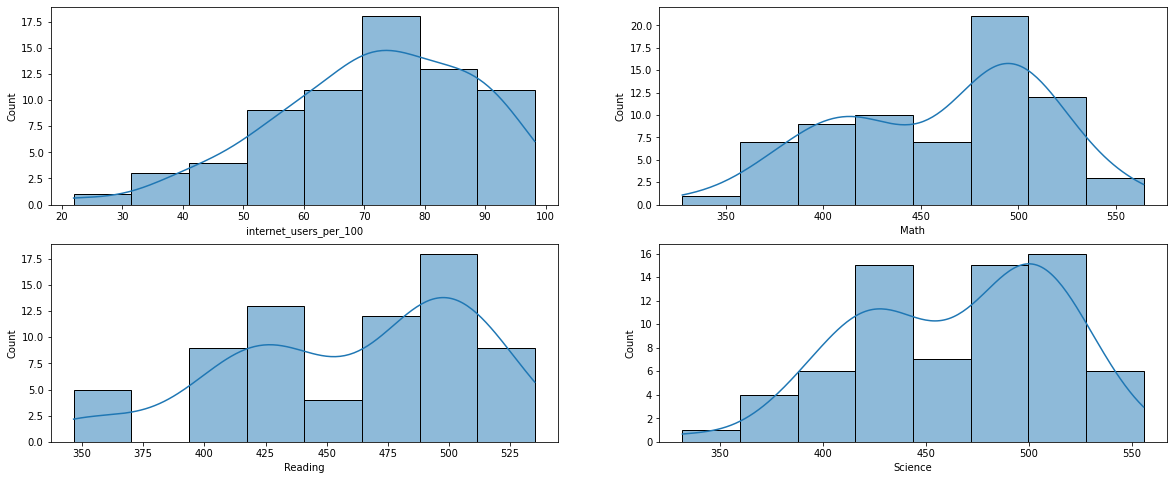

In [24]:
# First of all let's see how distribute the PISA scores for all over the world.

fig, axes = plt.subplots(2,2, figsize=(20,8))

sns.histplot(df_pisa['internet_users_per_100'], kde=True, ax=axes[0,0])
sns.histplot(df_pisa['Math'], kde=True, ax=axes[0,1])
sns.histplot(df_pisa['Reading'], kde=True, ax=axes[1,0])
sns.histplot(df_pisa['Science'], kde=True, ax=axes[1,1]);

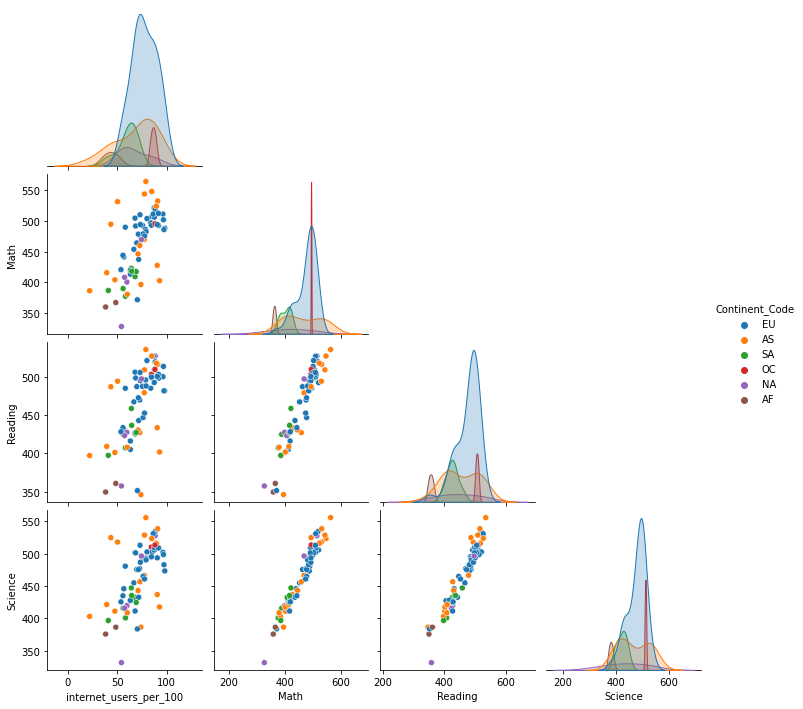

In [25]:
sns.pairplot(df_pisa, hue = 'Continent_Code', corner = True);

##Analysis for EU

In [26]:
df_EU = df_pisa[df_pisa["Continent_Code"]=="EU"]
df_EU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [27]:
df_EU.describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [28]:
df_EU.shape

(37, 6)

In [29]:
df_EU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

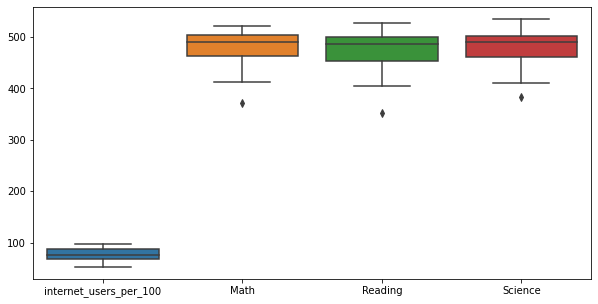

In [30]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_EU);

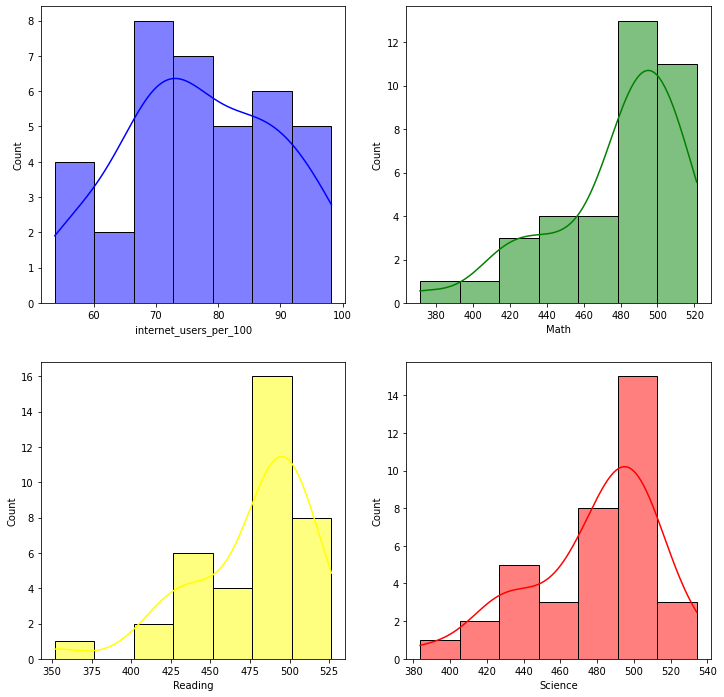

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df_EU, x="internet_users_per_100", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=df_EU, x="Math", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=df_EU, x="Reading", kde=True, color="yellow", ax=axs[1, 0])
sns.histplot(data=df_EU, x="Science", kde=True, color="red", ax=axs[1, 1]);

##Analysis for AS

In [32]:
df_AS = df_pisa[df_pisa["Continent_Code"]=="AS"]
df_AS.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [33]:
df_AS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [34]:
df_AS.shape

(17, 6)

In [35]:
df_AS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

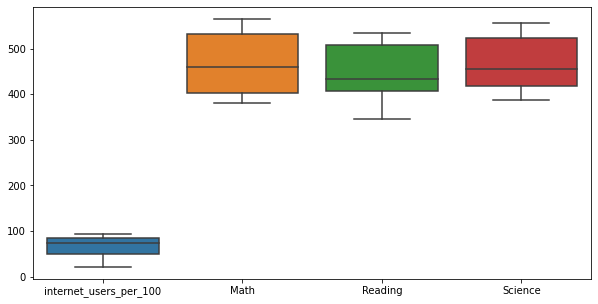

In [36]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_AS);

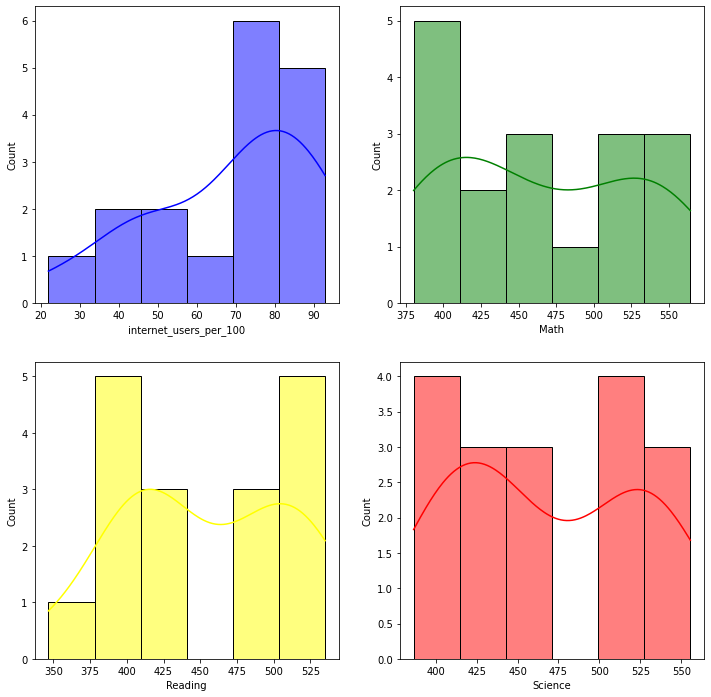

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df_AS, x="internet_users_per_100", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=df_AS, x="Math", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=df_AS, x="Reading", kde=True, color="yellow", ax=axs[1, 0])
sns.histplot(data=df_AS, x="Science", kde=True, color="red", ax=axs[1, 1]);

##Analysis for SA

In [38]:
df_SA = df_pisa[df_pisa["Continent_Code"]=="SA"]
df_SA.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836


In [39]:
df_SA.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [40]:
df_SA.shape

(7, 6)

In [41]:
df_SA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

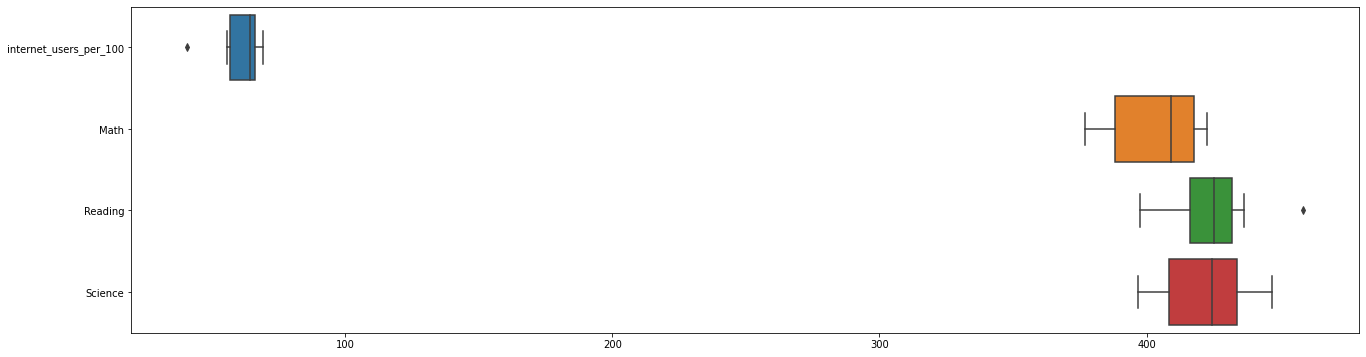

In [42]:
fig = plt.subplots(figsize=(22, 6))

sns.boxplot(data=df_SA,orient="h");

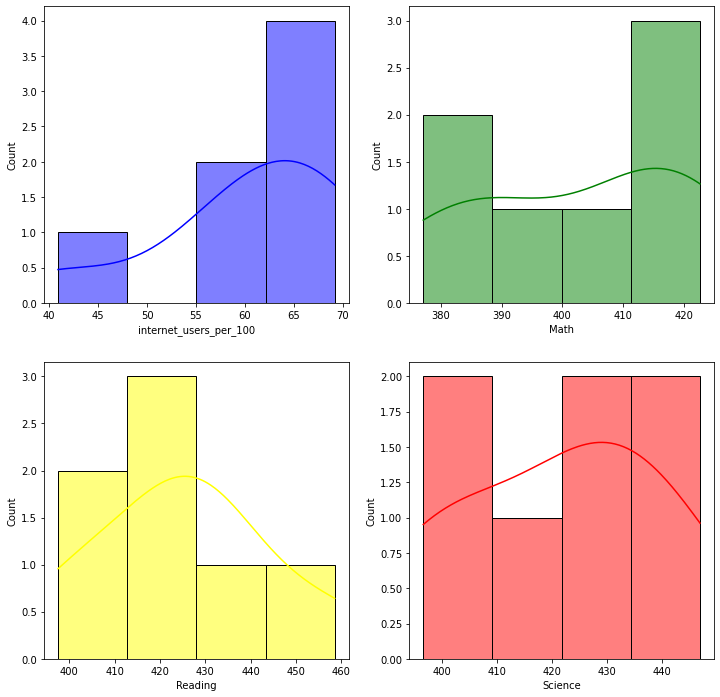

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df_SA, x="internet_users_per_100", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=df_SA, x="Math", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=df_SA, x="Reading", kde=True, color="yellow", ax=axs[1, 0])
sns.histplot(data=df_SA, x="Science", kde=True, color="red", ax=axs[1, 1]);

##Analysis for OC

In [44]:
df_OC = df_pisa[df_pisa["Continent_Code"]=="OC"]
df_OC.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [45]:
df_OC.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [46]:
df_OC.shape

(2, 6)

In [47]:
df_OC.var()

internet_users_per_100     6.706475
Math                       0.880597
Reading                   20.289087
Science                    5.476726
dtype: float64

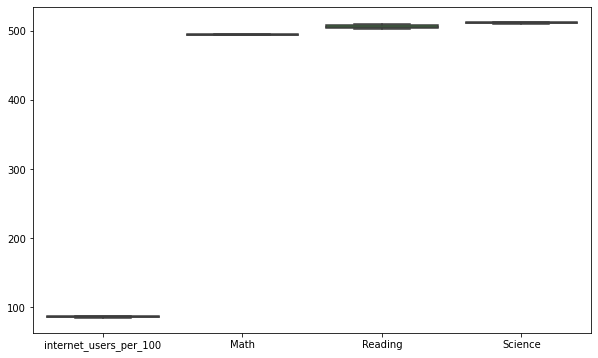

In [48]:
fig = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df_OC);

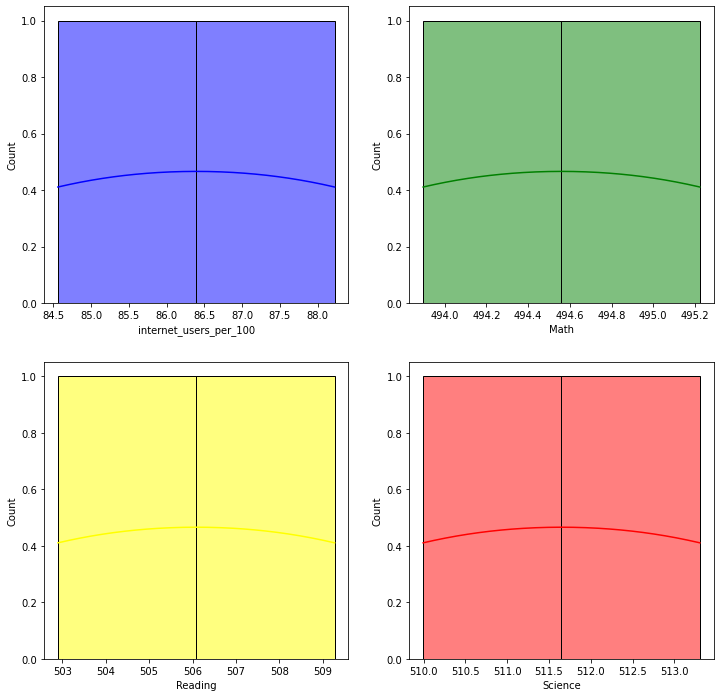

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df_OC, x="internet_users_per_100", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=df_OC, x="Math", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=df_OC, x="Reading", kde=True, color="yellow", ax=axs[1, 0])
sns.histplot(data=df_OC, x="Science", kde=True, color="red", ax=axs[1, 1]);

##Analysis for AF

In [50]:
df_AF = df_pisa[df_pisa["Continent_Code"]=="SA"]
df_AF.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836


In [51]:
df_AF.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [52]:
df_AF.shape

(7, 6)

In [53]:
df_AF.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

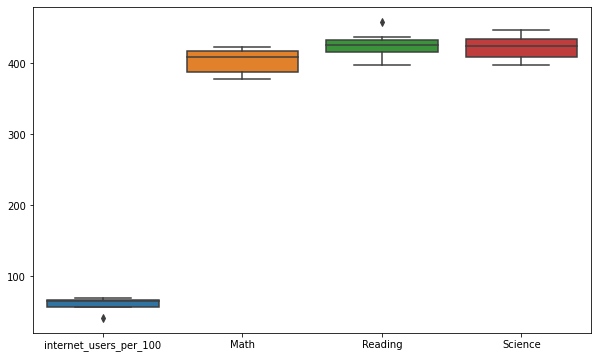

In [54]:
fig = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df_AF);

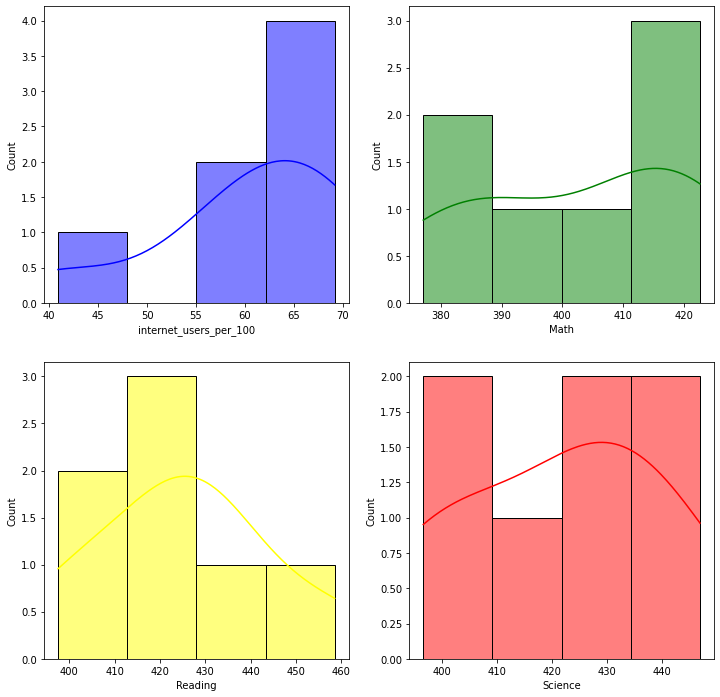

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df_AF, x="internet_users_per_100", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=df_AF, x="Math", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=df_AF, x="Reading", kde=True, color="yellow", ax=axs[1, 0])
sns.histplot(data=df_AF, x="Science", kde=True, color="red", ax=axs[1, 1]);

####(ii) Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [56]:
statistic, pvalue = stats.ttest_ind(df_EU.Math, df_AS.Math, nan_policy='omit')  # independet T test

statistic, pvalue

(0.870055317967983, 0.38826888111307345)

In [57]:
crtc_pvalue = 0.025

if pvalue < crtc_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


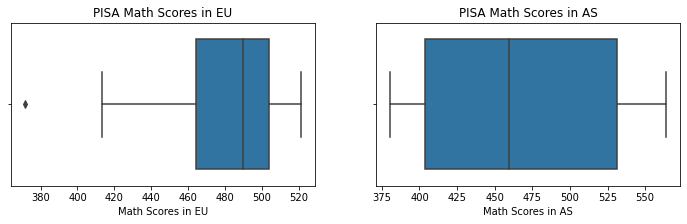

In [58]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

sns.boxplot(df_EU['Math'], ax=axes[0]).set(title='PISA Math Scores in EU')
sns.boxplot(df_AS['Math'], ax=axes[1]).set(title='PISA Math Scores in AS')

axes[0].set(xlabel='Math Scores in EU')
axes[1].set(xlabel='Math Scores in AS');

####EXERCISE 4.

The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [60]:
df_scores = pd.read_csv("students_2014 - students_2014.csv", sep = ",", na_values = ".", index_col = 0)

In [61]:
df_scores.sample(5)

,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
ids,,,,,,,,,,,,,,,,,,,,,,
31576,8/16/1994,5-Aug-2013,14-May-2018,2.0,NaN,1.0,1,65.02,143.05,0.0,5.644,0:07:00,NaN,80.45,66.51,72.36,In state,1.0,NaN,NaN,8.0,1.0
49445,1/13/1992,5-Aug-2013,13-May-2019,2.0,music tech (production),0.0,1,80.71,206.96,NaN,4.930,0:06:25,93.57,85.35,66.54,82.41,In state,0.0,3.0,31.0,10.0,NaN
27638,10/4/1992,6-Aug-2012,14-May-2018,3.0,graphic design,0.0,0,69.99,291.73,0.0,7.460,NaN,NaN,69.84,60.41,86.99,Out of state,0.0,1.0,16.0,5.0,5.0
26199,10/22/1991,5-Aug-2013,14-May-2018,2.0,bphil,1.0,0,64.88,162.80,0.0,7.990,0:12:06,83.20,76.03,54.85,85.80,In state,0.0,3.0,20.0,2.0,8.0
21939,12/12/1995,4-Aug-2014,11-May-2020,1.0,NaN,0.0,1,66.09,NaN,0.0,5.326,0:07:28,87.70,81.10,61.61,NaN,In state,0.0,3.0,39.0,6.0,5.0


In [62]:
df_scores.shape

(435, 22)

In [63]:
df_scores[["English", "Math"]].isnull().value_counts()

English  Math 
False    False    398
True     False     24
False    True      11
True     True       2
dtype: int64

In [64]:
df_scoresdrop = df_scores[["English", "Math"]].dropna()

In [65]:
df_scoresdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 43783 to 39298
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  398 non-null    float64
 1   Math     398 non-null    float64
dtypes: float64(2)
memory usage: 9.3 KB


In [66]:
df_scores[["English", "Math"]].describe()

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [67]:
Eng_mean =df_scores['English'].mean()
Eng_mean

82.78755501222493

In [68]:
Math_mean = df_scores['Math'].mean()
Math_mean

65.46800947867297

In [69]:
meandiff = Eng_mean - Math_mean
meandiff

17.31954553355196

H0: µEnglish - µMath = 0 ("the difference between the average English and Math scores is equal to 0")

H1: µEnglish - µMath ≠ 0 ("the difference between the average English and Math scores is not 0")

Before we perform our hypothesis tests, we should decide on a significance level (denoted α). The significance level is the threshold we will use to decide whether a test result is significant. For this example, let's use α = 0.05, or 5%.

In [70]:
stats.ttest_ind(df_scores.dropna()["English"], df_scores.dropna()["Math"])

Ttest_indResult(statistic=10.787205641803522, pvalue=1.1746036768217507e-18)

In [71]:
paired = stats.ttest_rel(df_scores["English"], df_scores["Math"], nan_policy='omit')
paired

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [72]:
t = paired.statistic
t

36.31256898171986

In [73]:
pvalue= paired.pvalue
pvalue

3.071098719220689e-128

In [74]:
# compare using p-value 

critical_pvalue = 0.025

if pvalue < critical_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
